# Metody obliczeniowe w nauce i technice
## Labolatorium 3
### Singular Value Decomposition
#### Mateusz Surjak

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import imageio
from PIL import Image
from mpl_toolkits.mplot3d import Axes3D

## Zadanie 1 Przekształcenie sfery w elipsoidę


#### 1. Zadanie polega na narysowaniu sfery jednostkowej w 3D korzystając z równania parametrycznego
<br>
<br>
$$ \textbf{v} = \begin{bmatrix}cos(s)sin(t) \\\ sin(s)sin(t) \\\ cos(t)\end{bmatrix}   $$
<br>
$$s \in [0, 2\pi], t \in [0, \pi]$$

In [4]:
def sphere(n):
    x = lambda s, t : np.cos(s) * np.sin(t)
    y = lambda s, t : np.sin(s) * np.sin(t)
    z = lambda s, t : np.cos(t)
    s = np.linspace(0, 2 * np.pi, n)
    t = np.linspace(0, np.pi, n)
    ss = []
    for i in s:
        ss.append(i)
    ss = [ss] * n
    tt = []
    for i in t:
        tt.append([i]*n)
    
    xx = x(ss,tt).flatten()
    yy = y(ss,tt).flatten()
    zz = z(ss,tt).flatten()
    
    fig = plt.figure()
    ax = plt.axes(projection="3d")
    ax.plot3D(xx, yy, zz)
    plt.show()

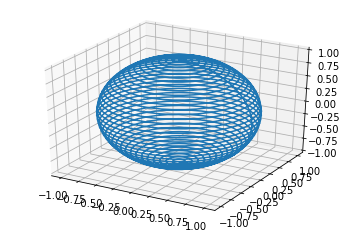

In [5]:
sphere(40)

Otrzymana sfera ma środek w punkcie (0,0,0) oraz promień 1

#### 2. Generowanie macierzy i przeształcenie sfery w elipsoidę


In [6]:
A_1 = np.random.rand(3, 3)
A_2 = np.random.rand(3, 3)
A_3 = np.random.rand(3, 3)

Za pomocą wygenerowanych macierzy przekształcę sferę w elipsoidy i zwizualizuję wynik

In [8]:
def transform_to_elipsoid(n,A):
    x = lambda s, t : np.cos(s) * np.sin(t)
    y = lambda s, t : np.sin(s) * np.sin(t)
    z = lambda s, t : np.cos(t)
    s = np.linspace(0, 2 * np.pi, n)
    t = np.linspace(0, np.pi, n)
    ss = []
    for i in s:
        ss.append(i)
    ss = [ss] * n
    tt = []
    for i in t:
        tt.append([i]*n)
    
    xx = x(ss,tt).flatten()
    yy = y(ss,tt).flatten()
    zz = z(ss,tt).flatten()

    row_stack = [xx, yy, zz]

    R = A @ row_stack
    fig = plt.figure(figsize = (10, 10))
    ax = plt.axes(projection="3d")
    ax.plot3D(R[0], R[1], R[2])
    plt.show()
    return R

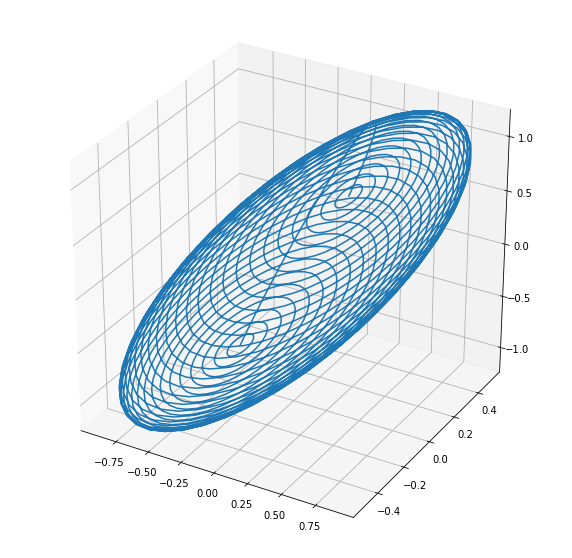

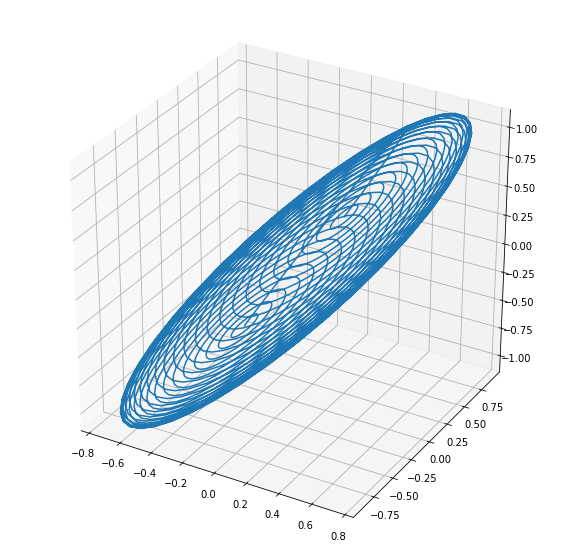

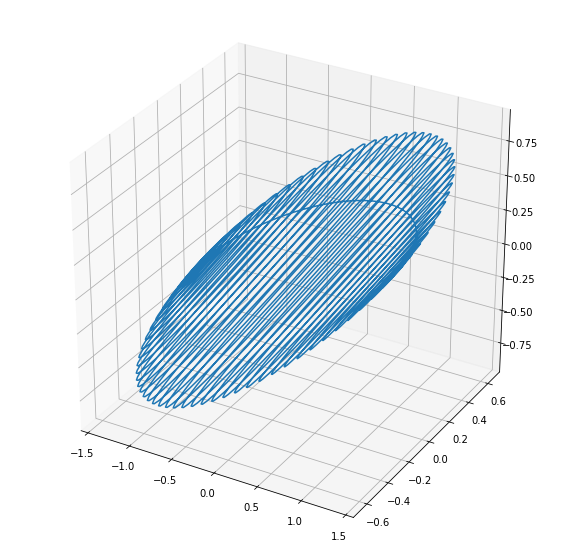

In [9]:
R_1 = transform_to_elipsoid(40,A_1)
R_2 = transform_to_elipsoid(40,A_2)
R_3 = transform_to_elipsoid(40,A_3)

#### 3. Dokonam rozkładu według wartości osobliwych (SVD) każdej macierzy $A_{i}$

In [10]:
u_1, s_1, vh_1 = np.linalg.svd(A_1)
u_2, s_2, vh_2 = np.linalg.svd(A_2)
u_3, s_3, vh_3 = np.linalg.svd(A_3)

In [11]:
def svd(U,S,P):
    x_start, y_start, z_start = [0,0,0]
    vec=U@(np.diag(S))
    x_end=vec[0]
    y_end=vec[1]
    z_end=vec[2]

    fig = plt.figure(figsize = (10, 10))
    ax = fig.gca(projection='3d')
    
    ax.plot3D(P[0], P[1], P[2])
    ax.quiver(x_start, y_start, z_start, x_end, y_end, z_end, color='black')
    
    plt.show()

Wizualizacja dla macierzy $A_{1}$

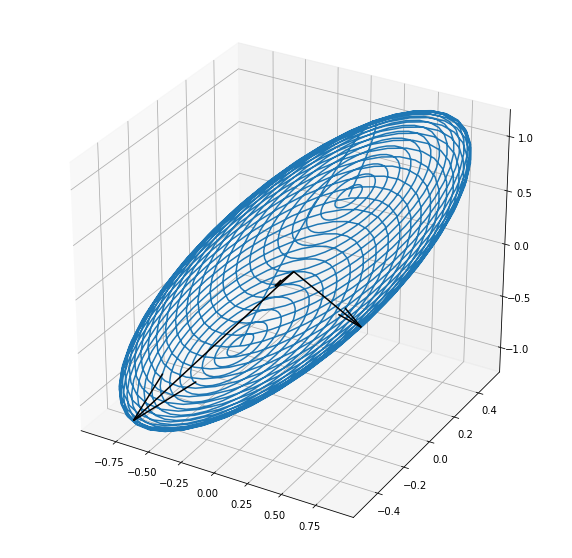

In [12]:
svd(u_1,s_1,R_1)

Wizualizacja dla macierzy $A_{2}$

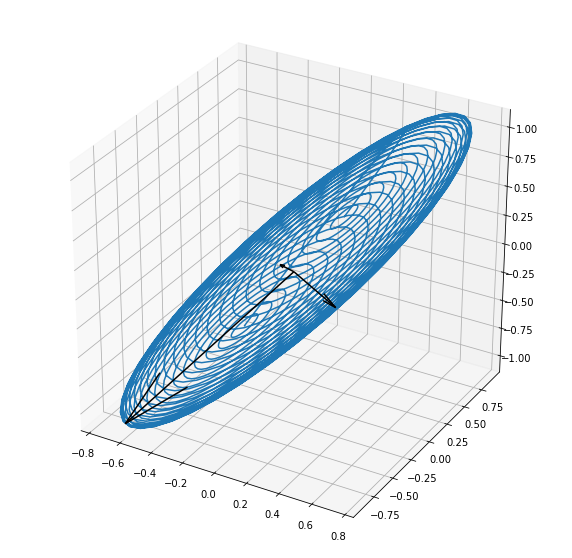

In [13]:
svd(u_2,s_2,R_2)

Wizualizacja dla macierzy $A_{3}$

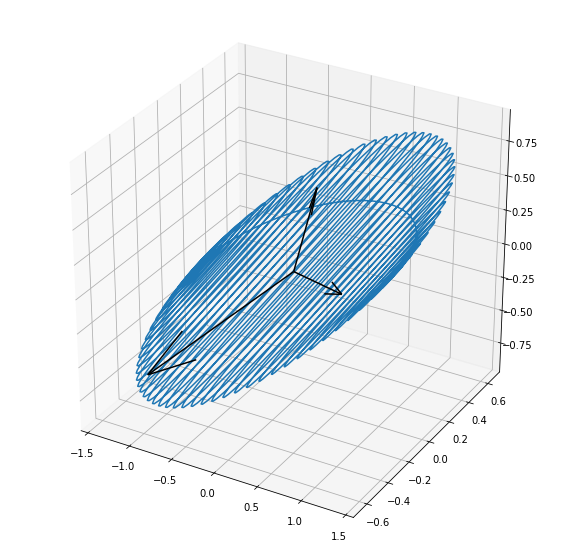

In [14]:
svd(u_3,s_3,R_3)

#### 4. Następnie znajdę taką macierz $A_{i}$, aby stosunek jej największej i najmniejszej wartości osobliwej był większy od 100.

In [15]:
def find_svd_matrix():
    M = np.random.rand(3,3)
    u, s, vh = np.linalg.svd(M)
    while s[0]/s[-1] <100:
        M = np.random.rand(3,3)
        u, s, vh = np.linalg.svd(M)
    print(M)
    return M

Szukana macierz przyjmuje poniższe wartości

In [16]:
M = find_svd_matrix()

[[0.38217543 0.27936931 0.3018014 ]
 [0.20002539 0.5961559  0.45087633]
 [0.97687723 0.65850309 0.74790686]]


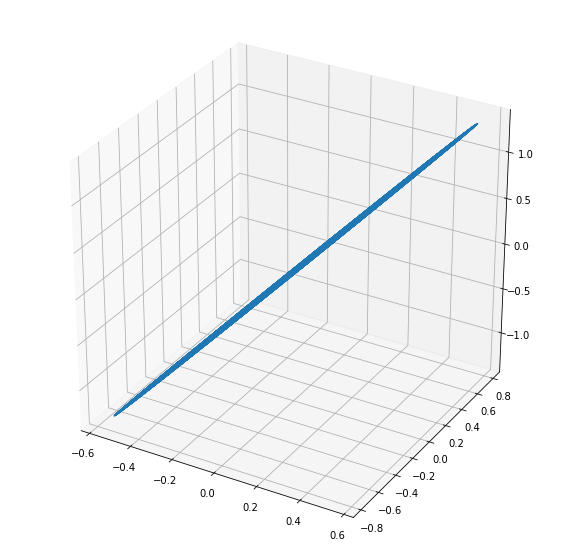

In [17]:
R = transform_to_elipsoid(30,M)

#### 5. Następnie do jednej z macierzy przedstawię wizualizację $SV_{i}^{T}$ ,  $S\sum_{i}V_{i}^{T}$ , $SU_{i}\sum_{i}V_{i}^{T}$ 

Funkcje pomocnicze

In [18]:
def sphere(n):
    x = lambda s, t : np.cos(s) * np.sin(t)
    y = lambda s, t : np.sin(s) * np.sin(t)
    z = lambda s, t : np.cos(t)
    s = np.linspace(0, 2 * np.pi, n)
    t = np.linspace(0, np.pi, n)
    ss = []
    for i in s:
        ss.append(i)
    ss = [ss] * n
    tt = []
    for i in t:
        tt.append([i]*n)
    
    xx = x(ss,tt).flatten()
    yy = y(ss,tt).flatten()
    zz = z(ss,tt).flatten()
    
    return [xx,yy,zz]

def plot(x, y, z):
    fig = plt.figure(figsize = (10, 10))
    ax = plt.axes(projection="3d")
    ax.plot3D(x, y, z)
    plt.show()

Wybraną macierzą jest $A_{1}$

In [19]:
U,sig,VH = np.linalg.svd(A_1)

- $SV_{i}^{T}$ 

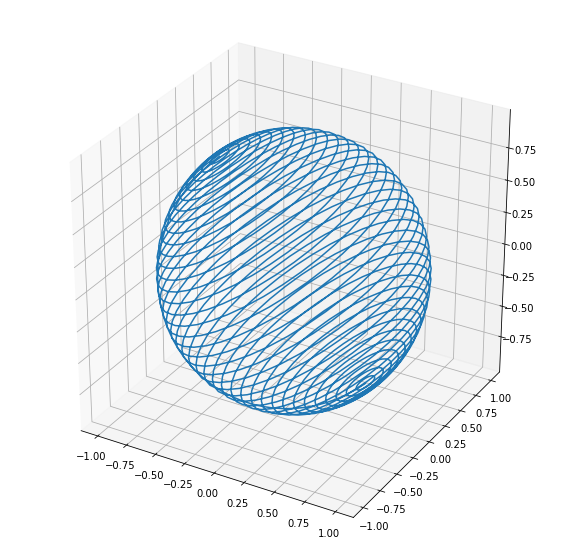

In [20]:
S = sphere(40)
Elip = VH@S
plot(Elip[0], Elip[1],Elip[2])

- $S\sum_{i}V_{i}^{T}$ 

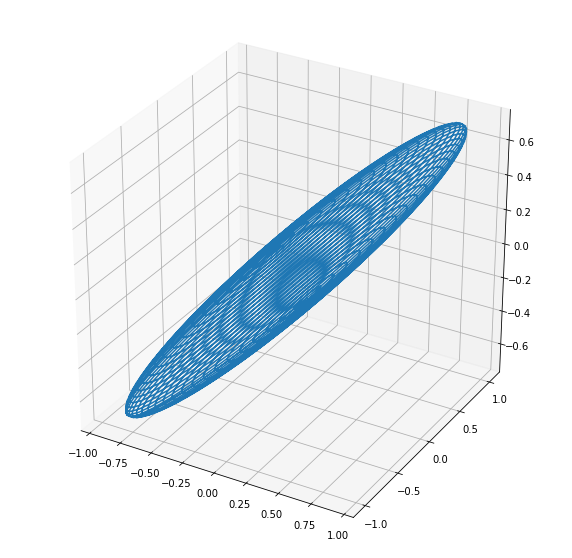

In [21]:
Elip = (VH @ np.diag(sig)) @ S
plot(Elip[0], Elip[1],Elip[2])

- $SU_{i}\sum_{i}V_{i}^{T}$ 

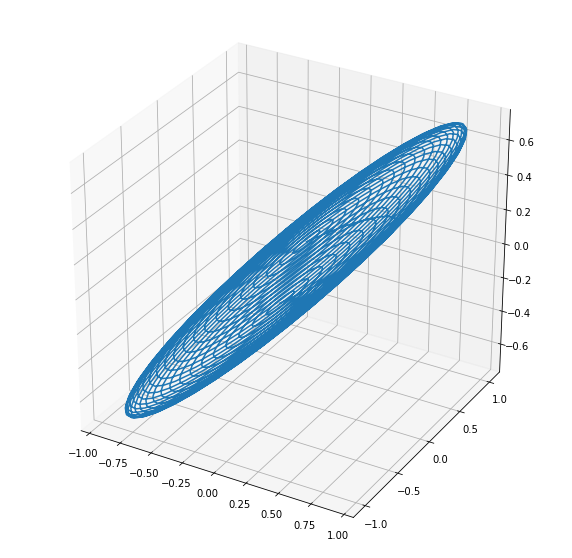

In [22]:
Elip = VH@np.diag(sig) @ U @ S
plot(Elip[0], Elip[1],Elip[2])

## Zadanie 2 Kompresja obrazu

Kompresji dokonam na zdjęciu 512 x 512 px.

<img src="images/image.png" />

Wczytuję obraz i obliczam SVD

In [128]:
from PIL import Image
import os
import sys
import numpy as np
from scipy import linalg


def low_rank_approximation(filename,rank):
    path, ext = os.path.splitext(filename)
    img = Image.open(filename)
    img = np.array(img)
    ared = img[:,:,0]
    agreen = img[:,:,1]
    ablue = img[:,:,2]
    k = rank
    ured, sred,vhred = np.linalg.svd(ared)
    redi = ured[:,:k]@np.diag(sred)[:k,:k]@vhred[:k,:]
    
    ugre, sgre,vhgre = np.linalg.svd(agreen)
    rgre = ugre[:,:k]@np.diag(sgre)[:k,:k]@vhgre[:k,:]
    
    ubl, sbl,vhbl = np.linalg.svd(ablue)
    rbl = ubl[:,:k]@np.diag(sbl)[:k,:k]@vhbl[:k,:]
    
    imgred = Image.fromarray(redi.astype('uint8'), mode=None)
    imggreen = Image.fromarray(rgre.astype('uint8'), mode=None)
    imgblue = Image.fromarray(rbl.astype('uint8'), mode=None)
    newimage = Image.merge("RGB", (imgred,imggreen,imgblue))
    newimage.show()


filename = "images/image.png"
# low_rank_approximation(filename,1)
# low_rank_approximation(filename,2)
# low_rank_approximation(filename,5)
# low_rank_approximation(filename,10)
# low_rank_approximation(filename,20)
# low_rank_approximation(filename,50)
# low_rank_approximation(filename,100)


Aproksymacja dla k = 1

In [132]:
low_rank_approximation(filename,3)


<img src="images/image_t1.png" />

Aproksymacja dla k = 2

<img src="images/image_t2.png" />

Aproksymacja dla k = 5

<img src="images/image_t5.png" />

Aproksymacja dla k = 10

<img src="images/image_t10.png" />

Aproksymacja dla k = 20

<img src="images/image_t20.png" />

Aproksymacja dla k = 50

<img src="images/image_t50.png" />

Aproksymacja dla k = 100

<img src="images/image_t100.png" />

Można zauważyć że wraz ze wzrostem K obraz staje się coraz bardziej podobny do rzeczywistego, 
dla dużych K rezultat jest naprawdę bardzo dobry i rożnica jest prawie niedostrzegalna.